In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from src.util import readJSON

os.chdir(globals()['_dh'][0])

In [13]:
# Load the matrices from JSON files
# file_path1 = 'calib/tcp_T_camera_feb05.json'
file_path1 = 'calib/tcp_T_camera_march20_wfov.json'
file_path2 = 'calib/tcp_T_camera_march20_nfov.json'
matrix1 = np.asarray(readJSON(file_path1)['extrinsic'])
matrix2 = np.asarray(readJSON(file_path2)['extrinsic'])

matrix1, matrix2

Reading JSON file calib/tcp_T_camera_march20_wfov.json ... Done
Reading JSON file calib/tcp_T_camera_march20_nfov.json ... Done


(array([[ 9.98110719e-01,  1.02713231e-02, -6.05763325e-02,
         -9.75624088e+00],
        [-1.01998622e-02,  9.99946872e-01,  1.48879297e-03,
         -3.98734868e-01],
        [ 6.05884060e-02, -8.68109978e-04,  9.98162457e-01,
          3.46397416e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 array([[ 9.98114360e-01,  1.07771921e-02, -6.04282712e-02,
         -1.02872989e+01],
        [-1.07127738e-02,  9.99941651e-01,  1.38991044e-03,
         -3.65635375e-01],
        [ 6.04397246e-02, -7.39935170e-04,  9.98171575e-01,
          1.85794105e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]))

In [14]:
# Calculate difference in translations
translation1 = matrix1[:3, 3]
translation2 = matrix2[:3, 3]
translation_diff = np.abs(translation1 - translation2)

# Calculate Cartesian distance
cartesian_distance = np.linalg.norm(translation1 - translation2)

# Rotation differences (simple subtraction here, consider other methods for specific angle differences)
rotation_diff = np.abs(matrix1[:3, :3] - matrix2[:3, :3])

# Print out the differences
print(f"Translation Differences (x, y, z): {translation_diff}")
print(f"Cartesian Distance: {cartesian_distance}")
print(f"Rotation Matrix Differences:\n{rotation_diff}")

Translation Differences (x, y, z): [0.53105806 0.03309949 1.60603311]
Cartesian Distance: 1.6918807832094058
Rotation Matrix Differences:
[[3.64102341e-06 5.05868992e-04 1.48061255e-04]
 [5.12911608e-04 5.22113118e-06 9.88825273e-05]
 [1.48681434e-04 1.28174807e-04 9.11708492e-06]]


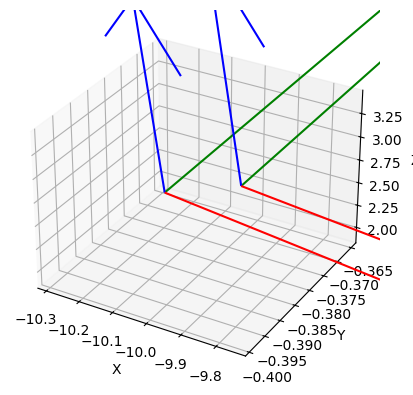

In [15]:
# Visualization function
def draw_frame(matrix, ax, length=1.0):
    origin = matrix[:3, 3]
    ax.quiver(origin[0], origin[1], origin[2], 
              matrix[0, 0], matrix[1, 0], matrix[2, 0], length=length, color='r')
    ax.quiver(origin[0], origin[1], origin[2], 
              matrix[0, 1], matrix[1, 1], matrix[2, 1], length=length, color='g')
    ax.quiver(origin[0], origin[1], origin[2], 
              matrix[0, 2], matrix[1, 2], matrix[2, 2], length=length, color='b')

# Plot the coordinate frames
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
draw_frame(matrix1, ax, 2)
draw_frame(matrix2, ax, 2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()